# Udacity Capstone Project

# Modelling

In [2]:
# load packages
import pandas as pd
import numpy as np
from datetime import datetime
import math
import seaborn as sns
import json
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# read in master_df, which was saved from 01_EDA notebook
df = pd.read_csv('master_df.csv', index_col=[0])
df.head()

,customer_id,offer_id,successful_offer,difficulty,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,age,income,days_as_member,gender_F,gender_M,gender_O
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,10,7,2,1,1,0,1,0,1,0,33.0,72000.0,1807.0,0.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0.0,0,4,0,1,1,0,1,0,0,1,33.0,72000.0,1807.0,0.0,1.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0.0,0,3,0,1,1,1,0,0,0,1,33.0,72000.0,1807.0,0.0,1.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,5,5,5,1,1,1,1,1,0,0,33.0,72000.0,1807.0,0.0,1.0,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,10,10,2,1,1,1,1,0,1,0,33.0,72000.0,1807.0,0.0,1.0,0.0


In [4]:
# successful_offer
df.groupby('successful_offer').size()

successful_offer
0.0    38828
1.0    24460
dtype: int64

In [5]:
# number of unique offers
df['offer_id'].nunique()

10

In [6]:
def rename_and_encode_offer_id(df):
    '''
    Fuction to encode offer id into dummy columns.
    '''
    unique_ids = list(df['offer_id'].unique())
    
    for i in range(len(unique_ids)):
        df['offer_id'] = df['offer_id'].apply(lambda x: f'offer_{i+1}' if x == unique_ids[i] else x)
        
    dummies = pd.get_dummies(df['offer_id'])
    new_df = pd.concat([df.drop('offer_id',axis=1), dummies],axis=1)
    
    return new_df

In [7]:
df = rename_and_encode_offer_id(df)
df = df.drop('customer_id', axis=1)
df.head()

,successful_offer,difficulty,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,...,offer_1,offer_10,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9
0,0.0,10,7,2,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0,4,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0,3,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,5,5,5,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,10,10,2,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


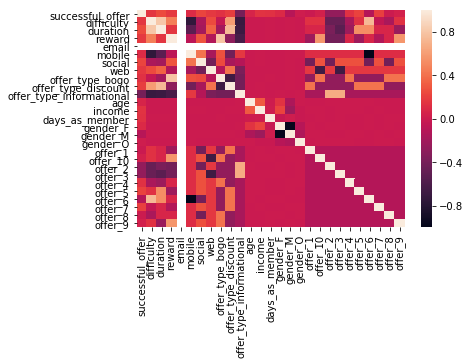

In [8]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
# drop email feature
df = df.drop('email', axis=1)

In [10]:
# replace nan values with 0
df = df.fillna(0)

In [11]:
df.columns

Index(['successful_offer', 'difficulty', 'duration', 'reward', 'mobile',
       'social', 'web', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational', 'age', 'income', 'days_as_member',
       'gender_F', 'gender_M', 'gender_O', 'offer_1', 'offer_10', 'offer_2',
       'offer_3', 'offer_4', 'offer_5', 'offer_6', 'offer_7', 'offer_8',
       'offer_9'],
      dtype='object')

## Data prep for modelling

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [14]:
# scale the data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [15]:
lr = LogisticRegression(solver='liblinear',random_state=0)

In [16]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
lr_pred = lr.predict(X_test)

In [18]:
accuracy_score(y_test, lr_pred)

0.75770263864749565

In [19]:
f1_score(y_test, lr_pred)

0.68630459241075992

In [20]:
# store accuracy and f1 scores
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

Text(0.5,15,'Predicted')

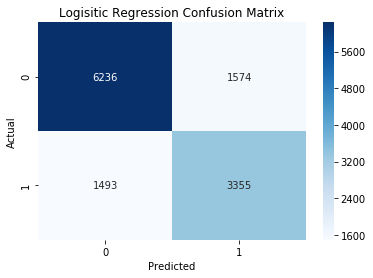

In [21]:
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt='d', cmap='Blues')
plt.title('Logisitic Regression Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Random Forest

In [22]:
rf = RandomForestClassifier(max_depth=10, random_state=0)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
rf_pred = rf.predict(X_test)

In [25]:
accuracy_score(y_test, rf_pred)

0.78085005530099538

In [26]:
f1_score(y_test, rf_pred)

0.70337895637296843

In [27]:
# store accuracy and f1 scores
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

Text(0.5,15,'Predicted')

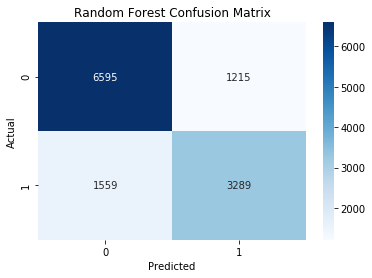

In [28]:
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Gradient Boosting Machine

In [29]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)

In [30]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
gb_pred = gb.predict(X_test)

In [32]:
accuracy_score(y_test, gb_pred)

0.77429293727287096

In [33]:
f1_score(y_test, gb_pred)

0.7024888055815891

In [34]:
# store accuracy and f1 scores
gb_acc = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

Text(0.5,15,'Predicted')

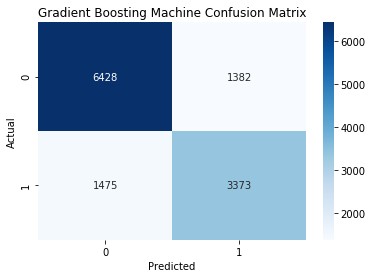

In [35]:
sns.heatmap(confusion_matrix(y_test, gb_pred),annot=True,fmt='d', cmap='Blues')
plt.title('Gradient Boosting Machine Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Support Vector Machine

In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [37]:
# scale the data
scaler = StandardScaler()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [38]:
svc = SVC(kernel='linear')

In [39]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svc_pred = svc.predict(X_test)

In [41]:
accuracy_score(y_test, svc_pred)

0.75477958603254858

In [42]:
f1_score(y_test, svc_pred)

0.6825526692575169

In [43]:
# store accuracy and f1 scores
svc_acc = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)

Text(0.5,15,'Predicted')

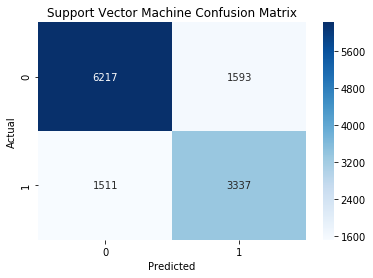

In [44]:
sns.heatmap(confusion_matrix(y_test, svc_pred),annot=True,fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Neural Networks

In [45]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [46]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100)

Train on 50630 samples, validate on 12658 samples
Epoch 1/30
50630/50630 [==============================] - 1s 18us/step - loss: 0.4657 - acc: 0.7510 - val_loss: 0.4486 - val_acc: 0.7615
Epoch 2/30
50630/50630 [==============================] - 1s 15us/step - loss: 0.4478 - acc: 0.7619 - val_loss: 0.4449 - val_acc: 0.7644
Epoch 3/30
50630/50630 [==============================] - 1s 15us/step - loss: 0.4434 - acc: 0.7663 - val_loss: 0.4410 - val_acc: 0.7664
Epoch 4/30
50630/50630 [==============================] - 1s 15us/step - loss: 0.4399 - acc: 0.7690 - val_loss: 0.4408 - val_acc: 0.7681
Epoch 5/30
50630/50630 [==============================] - 1s 15us/step - loss: 0.4378 - acc: 0.7715 - val_loss: 0.4368 - val_acc: 0.7731
Epoch 6/30
50630/50630 [==============================] - 1s 17us/step - loss: 0.4351 - acc: 0.7735 - val_loss: 0.4355 - val_acc: 0.7746
Epoch 7/30
50630/50630 [==============================] - 1s 15us/step - loss: 0.4343 - acc: 0.7736 - val_loss: 0.4323 - val_acc

In [47]:
nn_pred = model.predict(X_test) > 0.5

In [48]:
accuracy_score(y_test, nn_pred)

0.77595196713540848

In [49]:
f1_score(y_test, nn_pred)

0.717304625199362

In [50]:
# store accuracy and f1 scores
nn_acc = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

Text(0.5,15,'Predicted')

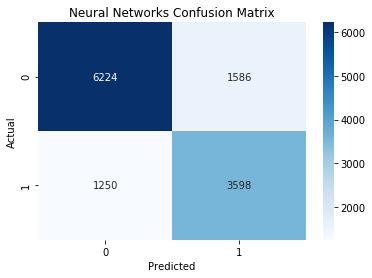

In [51]:
sns.heatmap(confusion_matrix(y_test, nn_pred),annot=True,fmt='d', cmap='Blues')
plt.title('Neural Networks Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Model Comparison

In [52]:
accuracy = np.array([lr_acc, rf_acc, gb_acc, svc_acc, nn_acc]).reshape(-1,1)
f1_score = np.array([lr_f1, rf_f1, gb_f1, svc_f1, nn_f1]).reshape(-1,1)

In [54]:
model_metrics = pd.DataFrame(np.concatenate((accuracy, f1_score), axis=1), columns=['Accuracy','F1 Score'])

model_names = np.array(['Logistic Regression', 'Random Forest', 'Gradient Boosting Machine',
                       'Support Vector Machine', 'Neural Networks']).reshape(-1,1)

model_metrics = pd.concat([model_metrics, pd.DataFrame(model_names)],axis=1)

model_metrics.columns = ['Accuracy','F1 Score','Model Names']

model_metrics.set_index('Model Names').sort_values(by='F1 Score',ascending=False)

,Accuracy,F1 Score
Model Names,,
Neural Networks,0.775952,0.717305
Random Forest,0.780850,0.703379
Gradient Boosting Machine,0.774293,0.702489
Logistic Regression,0.757703,0.686305
Support Vector Machine,0.754780,0.682553


#### Conclusion: Since this is a binaray classification model, F1 score will be a better choice as it is the weighted harmonic mean of recall and precision. By comparing model performance, Neural Networks and Random Forest  are two final winners.